Online news poplarity is a dataset from UCI Machine Learning Repository. 

The dataset contains 61 attributes and 39644 instances. The goal is to predict the number of shares of an article on social media.

 This is a reasonable assumption as the no.of shares is a direct measure of the number of people who have read the article and found it interesting enough to share it.

Importing the necessary libraries and the dataset:

```python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# uploading dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = df.columns.str.replace(' ', '')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Clean the data

In [3]:
# check for any articles with 0 words in them
no_word_articles=df[df['n_tokens_content']==0].index
print(no_word_articles.size)

1181


In [4]:
# remove the articles with 0 words
df = df[df['n_tokens_content']!=0]


In [5]:
# check for any articles with 0 words in title
no_title_articles=df[df['n_tokens_title']==0].index
print(no_title_articles.size)

0


In [6]:
# drop the non predictive features
df.drop(labels=['url', 'timedelta'], axis=1, inplace=True)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,10.382419,563.295375,0.565049,1.027065,0.710336,11.217872,3.394769,4.563061,1.263786,4.687892,...,0.098376,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930,3355.360398
std,2.113800,468.299538,3.573022,5.307978,3.312293,11.340580,3.869773,8.295365,4.164896,0.283231,...,0.070382,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636,11585.968776
min,2.000000,18.000000,0.114964,1.000000,0.119134,0.000000,0.000000,0.000000,0.000000,3.600000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,1.000000,0.632588,5.000000,1.000000,1.000000,0.000000,4.496250,...,0.050000,0.600000,-0.331532,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542986,1.000000,0.693727,8.000000,3.000000,1.000000,0.000000,4.674121,...,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,1.000000,0.756944,14.000000,4.000000,4.000000,1.000000,4.861901,...,0.100000,1.000000,-0.193415,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
#drop any duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38463 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 38463 non-null  float64
 1   n_tokens_content               38463 non-null  float64
 2   n_unique_tokens                38463 non-null  float64
 3   n_non_stop_words               38463 non-null  float64
 4   n_non_stop_unique_tokens       38463 non-null  float64
 5   num_hrefs                      38463 non-null  float64
 6   num_self_hrefs                 38463 non-null  float64
 7   num_imgs                       38463 non-null  float64
 8   num_videos                     38463 non-null  float64
 9   average_token_length           38463 non-null  float64
 10  num_keywords                   38463 non-null  float64
 11  data_channel_is_lifestyle      38463 non-null  float64
 12  data_channel_is_entertainment  38463 non-null 

There are no duplicates and no missing values in the dataset.

Exploratory Data Analysis 

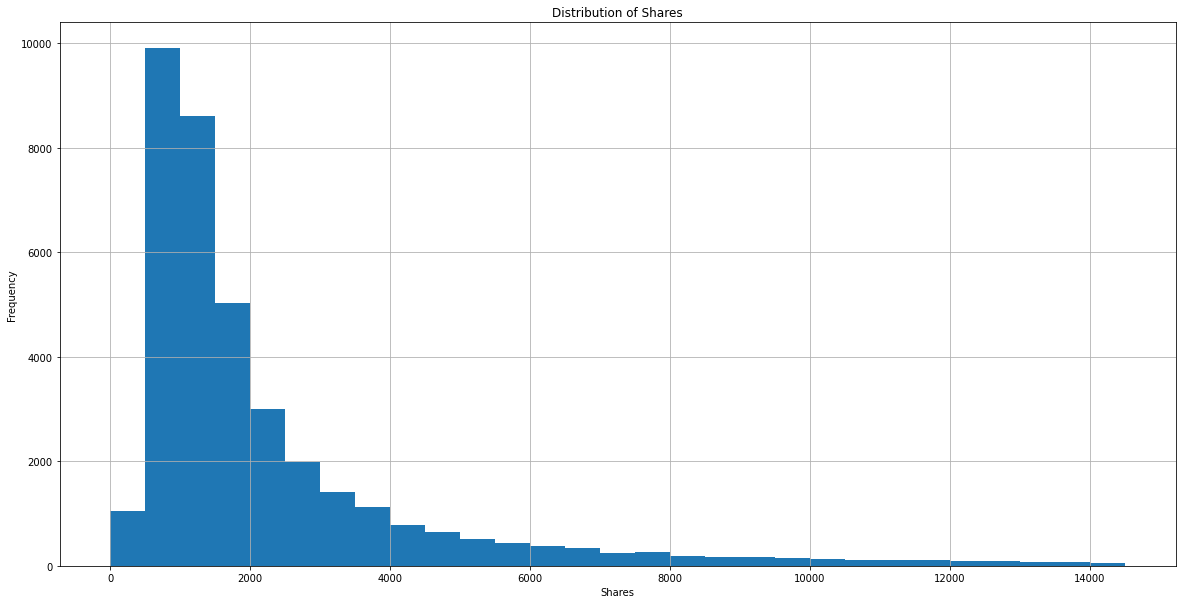

The median number of shares is 1400.0
The mean number of shares is 3355.3603983048642


In [9]:
n_shares = np.arange(0, 15000, 500)

df['shares'].hist(bins = n_shares, figsize = (20, 10))
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

print('The median number of shares is', df['shares'].median())
print('The mean number of shares is', df['shares'].mean())

Most of the articles are shared less than 2000 times. The distribution of the number of shares is skewed to the right. The median is 1400 shares, while the mean is 3395 shares. The maximum number of shares is 843300 shares.

<AxesSubplot:>

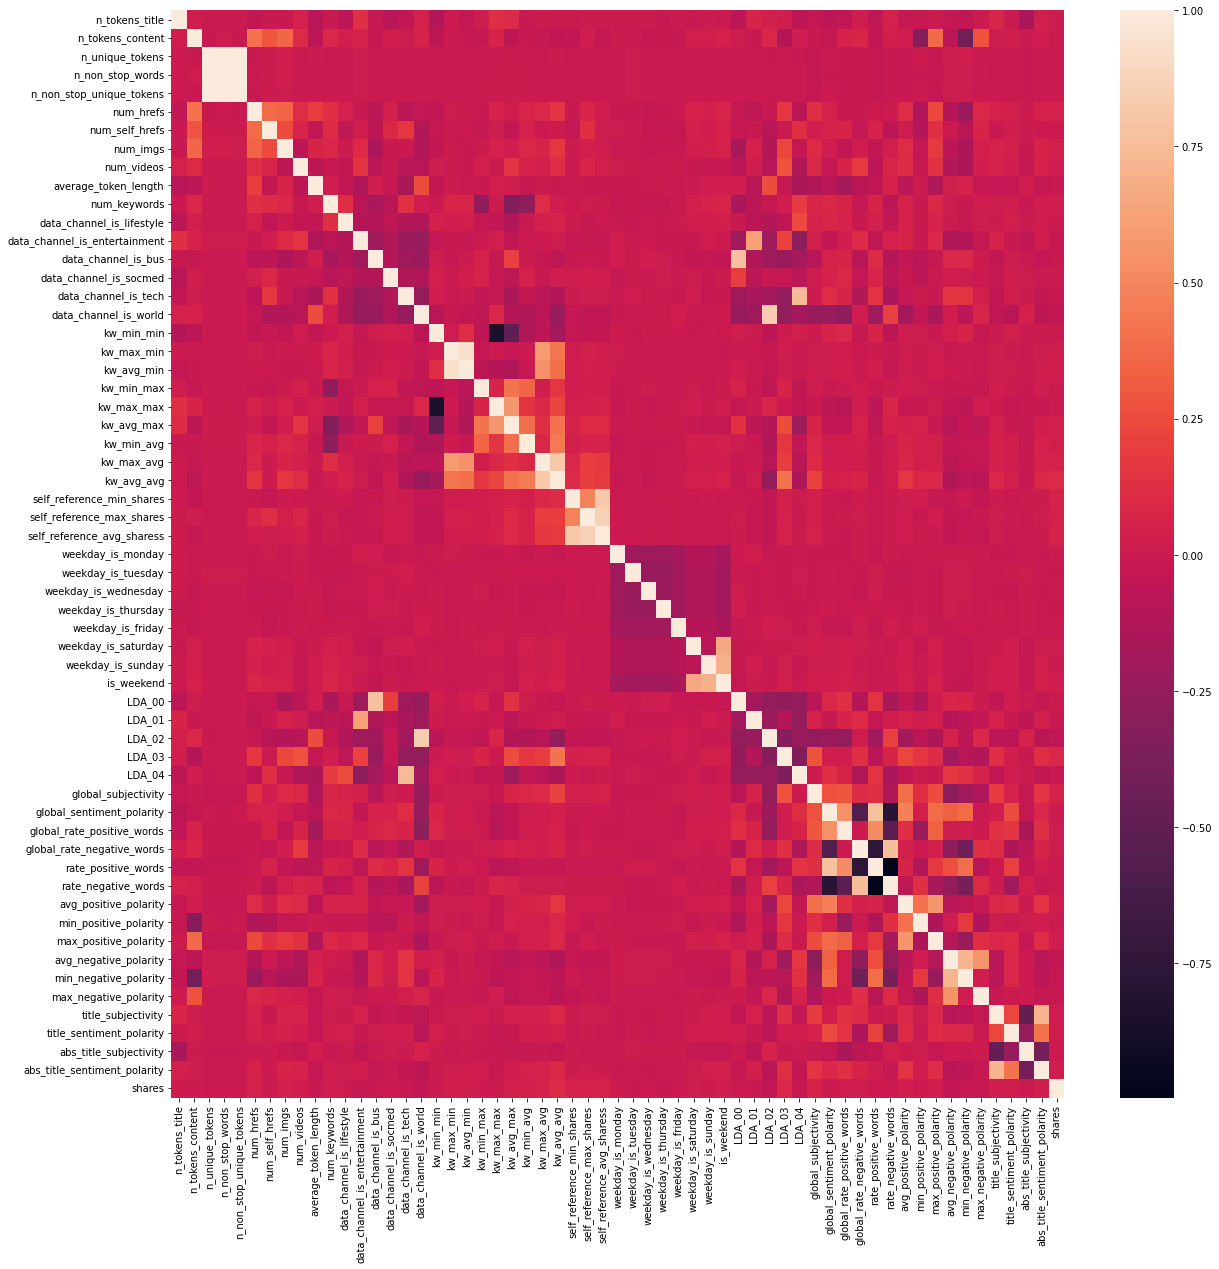

In [10]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr()) 

*High Positive Correlation :*

    ['n_unique_tokens' : 'n_non_stop_unique_tokens', 'n_non_stop_words]
    
    ['kw_max_min': kw_avg_min']
        
    ['self_reference_min_shares': 'self_reference_max_shares', 'self_reference_avg_sharess']
        
    ['LDA_00' : 'data_channel_is_entertainment']

    ['LDA_02' : 'data_channel_is_world']

    ['LDA_04' : 'data_channel_is_tech']
    
*High Negative Correlation :*

    ['kw_min_min' : 'kw_max_max']

    ['rate_positive_words' : 'global_rate_negative_words', 'rate_negative_words']
    

Let's first see what is the average shares for each weekday.

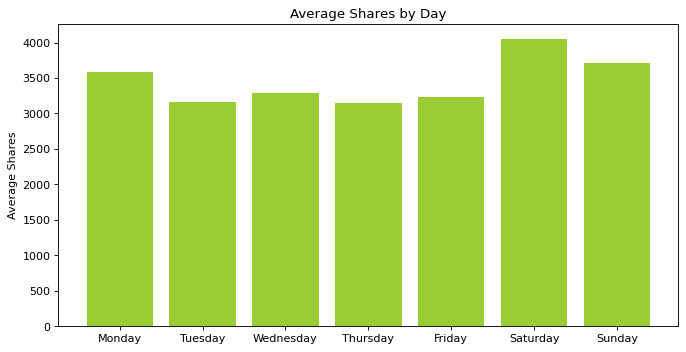

In [11]:
days = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']
shares_by_day = [df[df[day] == 1]['shares'].mean() for day in days]
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5), dpi=80)
plt.xticks(np.arange(len(days)), day_names)
plt.bar(days, shares_by_day, color='yellowgreen')
plt.title('Average Shares by Day')
plt.ylabel('Average Shares')


plt.show()



<AxesSubplot:xlabel='is_weekend'>

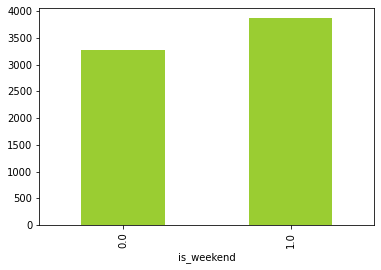

In [12]:
#lets check if there is any correlation with is_weekend and shares

df.groupby('is_weekend')['shares'].mean().plot(kind='bar', color='yellowgreen')
#weekend the shares are a bit more

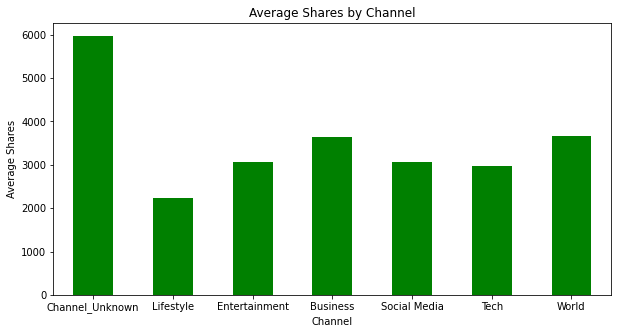

In [13]:
#checking by data channel
data_channels = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']

shares_by_channel = df.groupby(data_channels)['shares'].mean()
channels_names = ['Channel_Unknown','Lifestyle','Entertainment','Business','Social Media','Tech','World']

shares_by_channel.plot(kind='bar',figsize=(10,5),title='Average Shares by Channel',color='green')
plt.xticks(np.arange(7),channels_names,rotation=0)
plt.xlabel('Channel')
plt.ylabel('Average Shares')
plt.title('Average Shares by Channel')
plt.show()









In [14]:
feature_data = df.drop( 'shares',axis=1)
target_data = df['shares']




<AxesSubplot:title={'center':'Correalation with response variable'}>

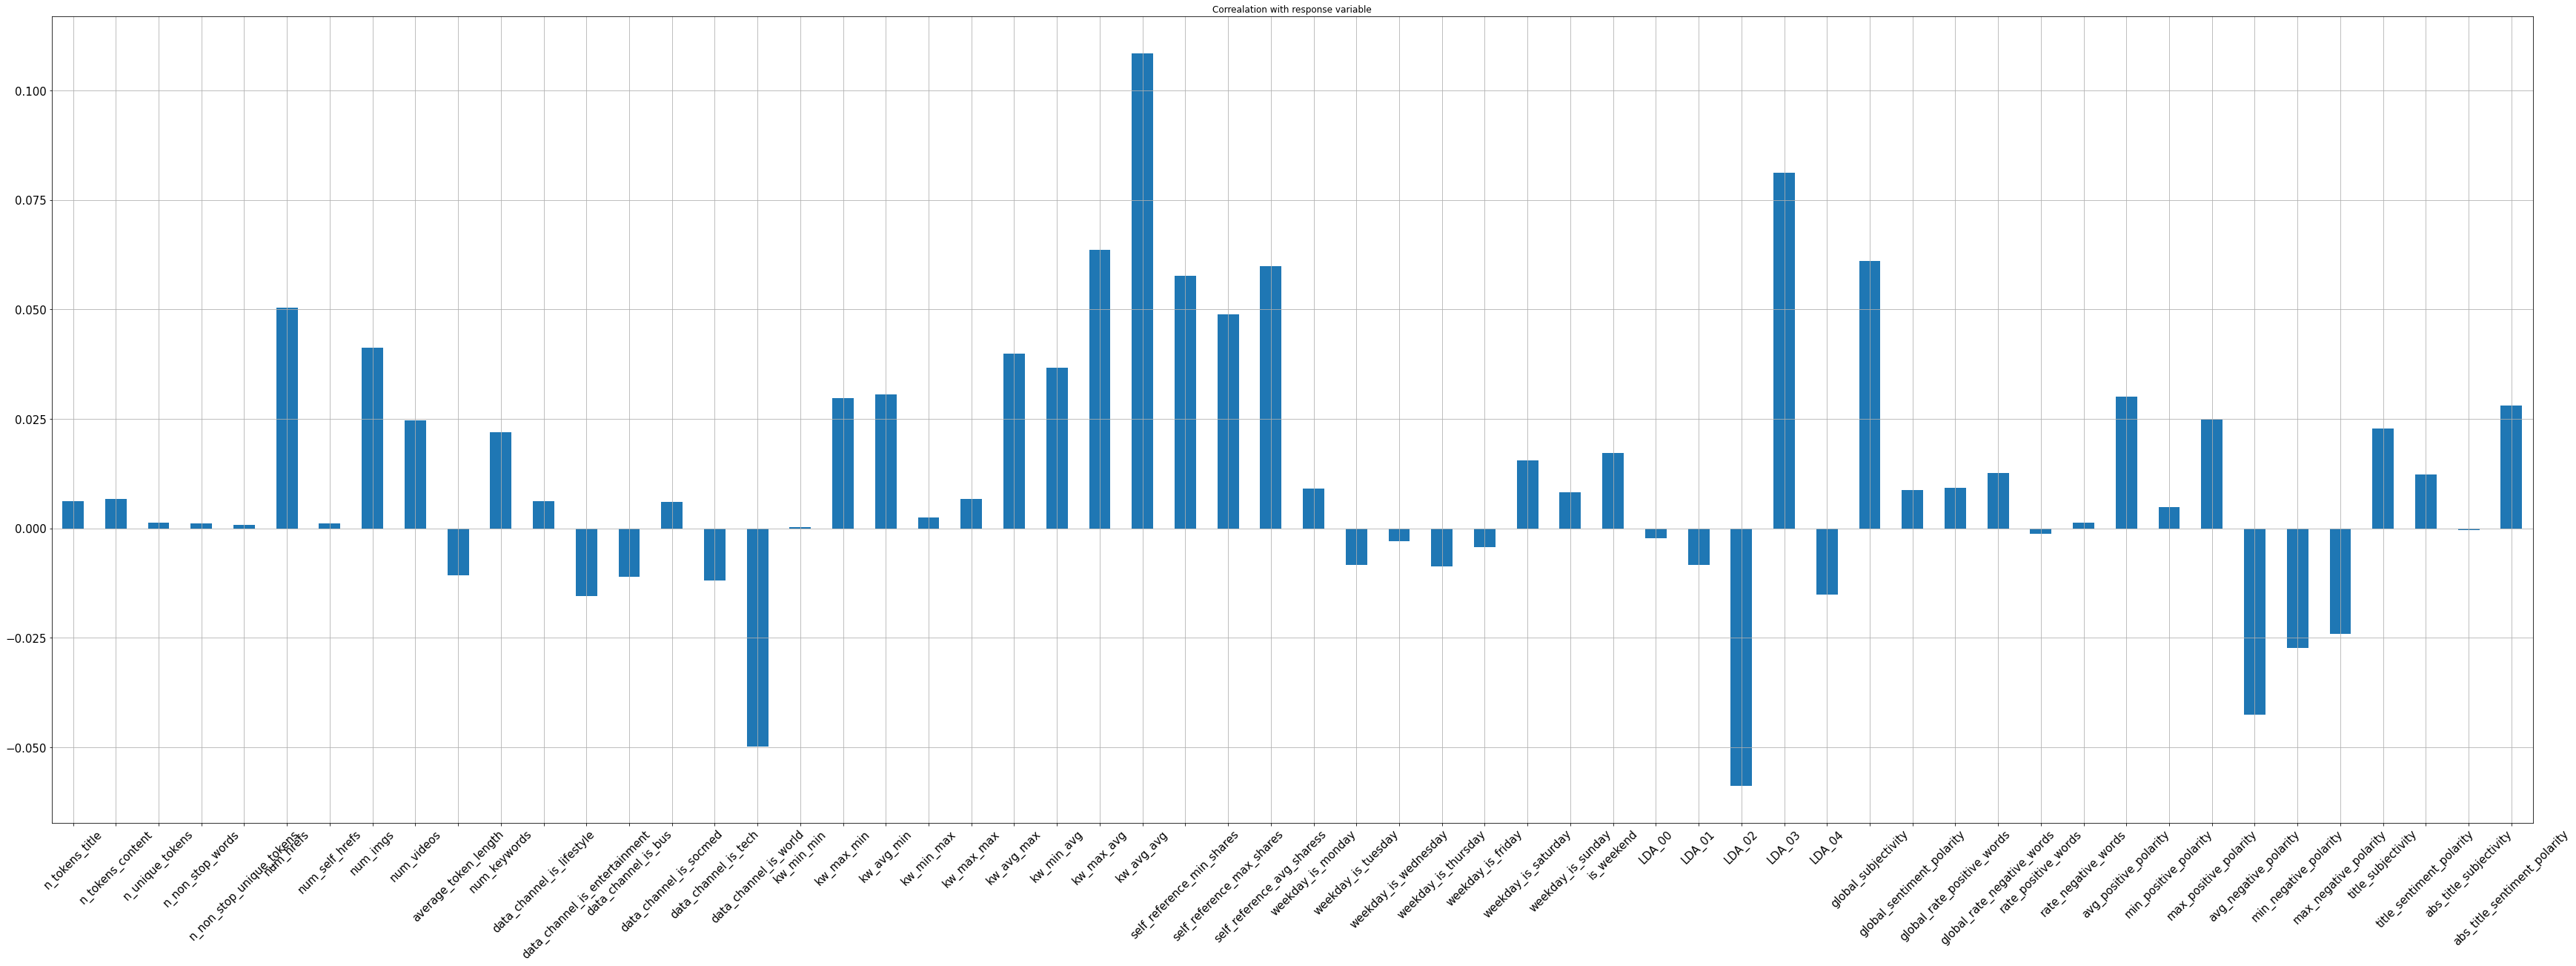

In [15]:
feature_data.corrwith(target_data).plot.bar(figsize=(60,20),title="Correalation with response variable",fontsize=15,rot=45,grid=True)

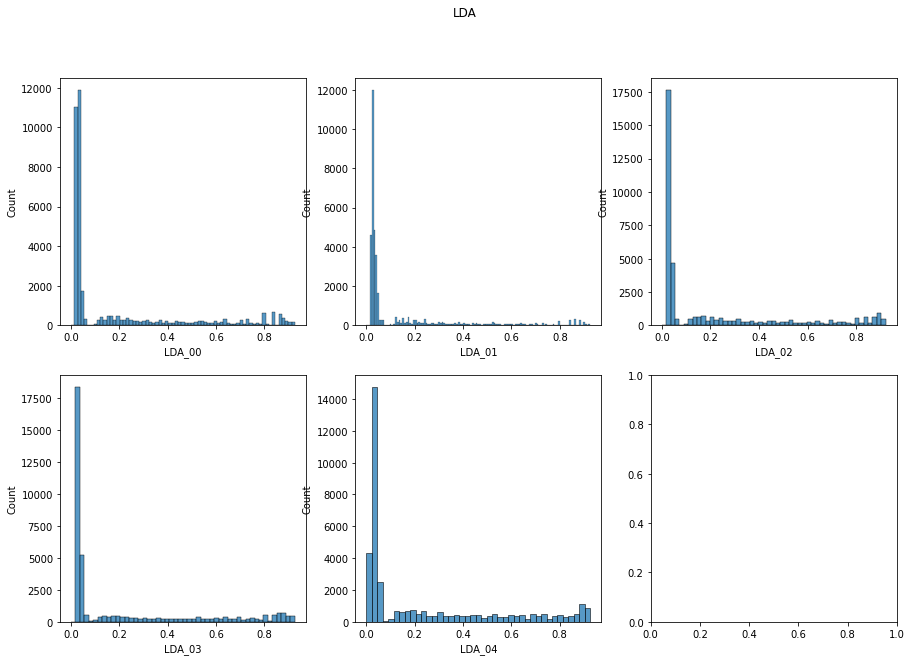

In [16]:
fig, axs = plt.subplots(2, 3)
fig.suptitle('LDA')
fig.set_figheight(10)
fig.set_figwidth(15)
sns.histplot(data=df, x="LDA_00", kde=False,ax=axs[0, 0])
sns.histplot(data=df, x="LDA_01", kde=False,ax=axs[0, 1])
sns.histplot(data=df, x="LDA_02", kde=False,ax=axs[0, 2])
sns.histplot(data=df, x="LDA_03", kde=False,ax=axs[1, 0])
sns.histplot(data=df, x="LDA_04", kde=False,ax=axs[1, 1])
plt.show()

In [17]:
#the coulums with less than 0.01 correlation with the target variable are dropped
less_corr = df.columns[df.corr()['shares']<0.01]
feature_data.drop(less_corr,axis=1,inplace=True)


In [18]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_data)
scaled_data = pd.DataFrame(scaled_data, columns=feature_data.columns)
scaled_data.head()



,num_hrefs,num_imgs,num_videos,num_keywords,kw_max_min,kw_avg_min,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,...,weekday_is_saturday,is_weekend,LDA_03,global_subjectivity,global_rate_negative_words,avg_positive_polarity,max_positive_polarity,title_subjectivity,title_sentiment_polarity,abs_title_sentiment_polarity
0,-0.636472,-0.429530,-0.303442,-1.155798,-0.297576,-0.502764,-1.936095,-0.977811,-0.919158,-2.38501,...,-0.256192,-0.387702,-0.598850,0.731275,-0.323346,0.163215,-0.376285,0.678170,-0.977914,0.144352
1,-0.724652,-0.429530,-0.303442,-1.677601,-0.297576,-0.502764,-1.936095,-0.977811,-0.919158,-2.38501,...,-0.256192,-0.387702,-0.568261,-1.309484,-0.135618,-0.910136,-0.376285,-0.867153,-0.268586,-0.686644
2,-0.724652,-0.429530,-0.303442,-0.633996,-0.297576,-0.502764,-1.936095,-0.977811,-0.919158,-2.38501,...,-0.256192,-0.387702,-0.626292,2.774679,-0.721908,1.534683,1.035440,-0.867153,-0.268586,-0.686644
3,-0.195572,-0.429530,-0.303442,-0.112194,-0.297576,-0.502764,-1.936095,-0.977811,-0.919158,-2.38501,...,-0.256192,-0.387702,-0.641621,-0.307001,0.339390,0.248978,0.094290,-0.867153,-0.268586,-0.686644
4,0.686228,1.860936,-0.303442,-0.112194,-0.297576,-0.502764,-1.936095,-0.977811,-0.919158,-2.38501,...,-0.256192,-0.387702,-0.642773,0.639460,-0.471794,0.543433,1.035440,0.537687,0.247289,-0.082284


Implementing Linear Regression will produce a mean absolute error of 3300.702 

Since there are many features, we can use Ridge Regression to reduce the complexity of the model. Ridge Regression produces a mean absolute error of 2708.341 which is better than Linear Regression.

Ridge Regression although better does not improve much and produces a mean absolute error of 2708.341.

Boosting the model using XGBoost produces no improvement.

Polynomial Regression, Decision Tree Regression and Random Forest Regression also perform pretty bad and this implies the target variable is not linearly dependent on the features.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_data, random_state=42)


In [26]:
# other regression algorithms

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [33]:
# lets perform feature extraction and analysis on the dataset

#feature extraction
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import NMF




In [36]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\divak\AppData\Local\Temp\ipykernel_25408\129465922.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


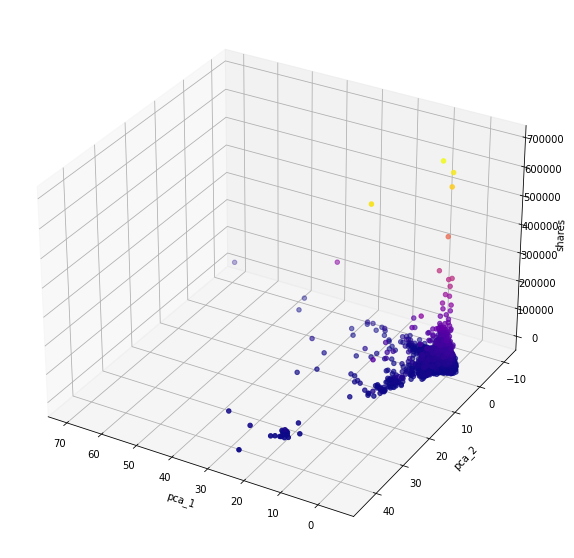

In [37]:
# draw a  plot to visualize the relationship between pca components and target variable
%matplotlib inline

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_pca[:,0],
    ys=X_pca[:,1],
    zs=y_train,
    c=y_train,
    cmap='plasma'
)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('shares')

#rotate the plot
ax.view_init(30, 120)

plt.show()




we can now be pretty sure that the target variable is not linearly correlated with any of the features. This is a good thing, because it means that we can't just use a linear model to predict the target variable. We will have to use a more complex model.

In [38]:
from scipy import stats

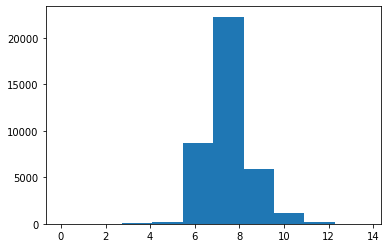

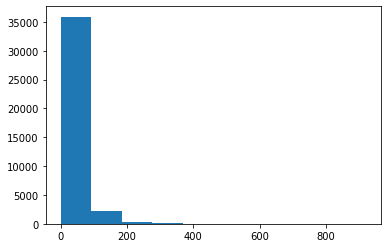

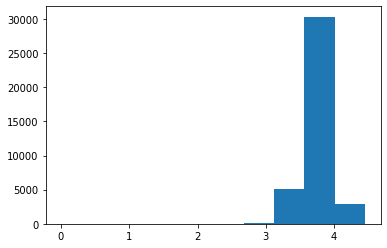

In [39]:
#lets try doing a non linear transformation on the target variable
#lets try log transformation

log_y = np.log(target_data)
plt.hist(log_y)
plt.show()

#lets try sqrt transformation

sqrt_y = np.sqrt(target_data)
plt.hist(sqrt_y)
plt.show()
#lets try boxcox transformation

boxcox_y = stats.boxcox(target_data)[0]
plt.hist(boxcox_y)

plt.show()



Now let's go ahead with the log transformation of the target variable.

<AxesSubplot:>

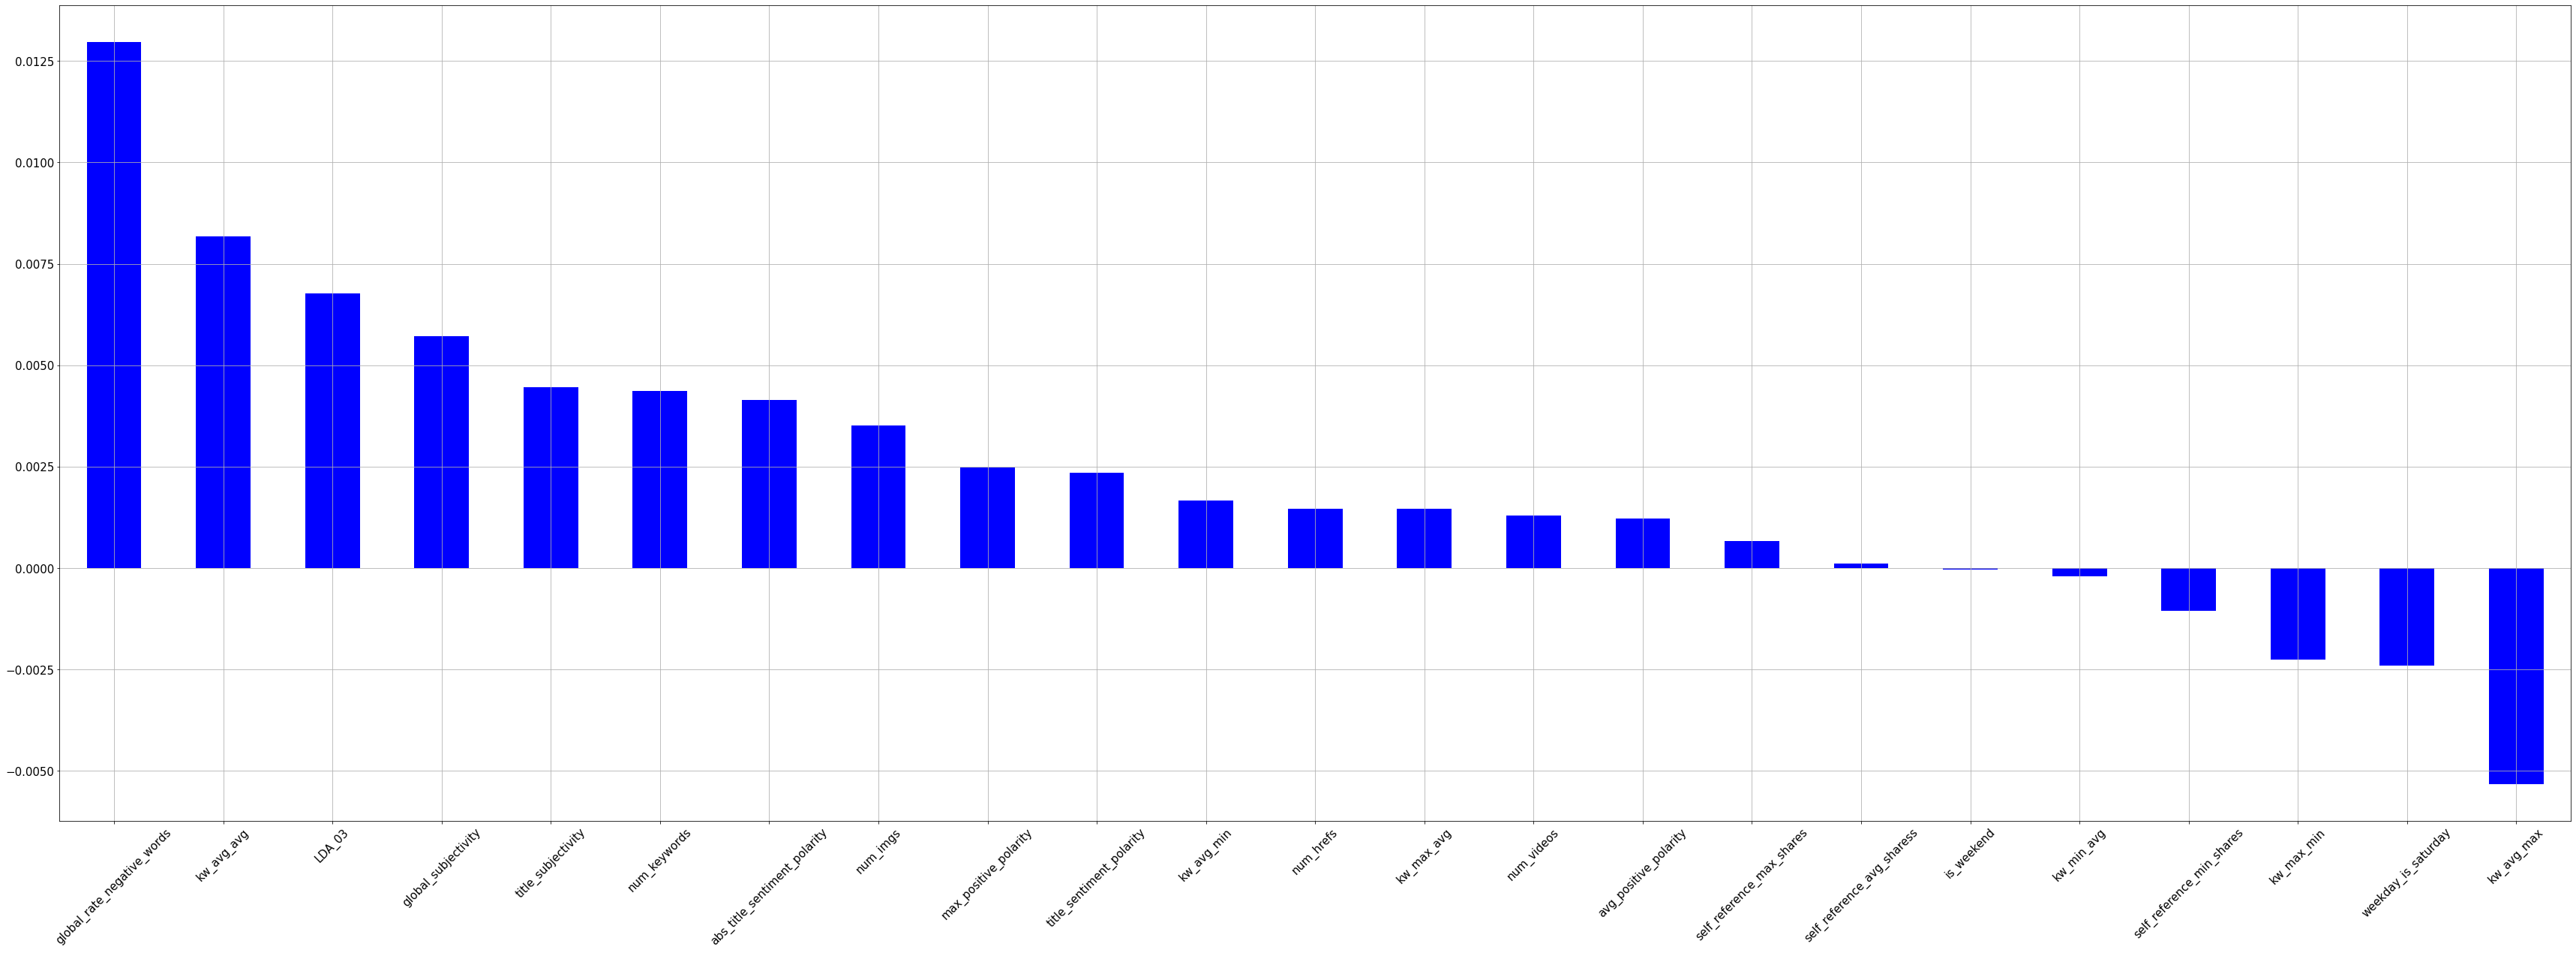

In [46]:
#check the correlation between the target variable and the other variables

scaled_data.corrwith(log_y).sort_values(ascending=False).plot(kind='bar', figsize=(60,20), fontsize=15, color='blue', rot=45, grid=True)


In [49]:
# further drop the variables with correlation < 0.1

columns_2 = scaled_data.columns[scaled_data.corrwith(log_y) < 0.05]

scaled_data.drop(columns_2, axis=1, inplace=True)
scaled_data

""
0
1
2
3
4
...
38458
38459
38460
38461


In [50]:
# now try regression

#split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(scaled_data, log_y, random_state=1)



In [51]:
#linear regression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('R^2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))

ValueError: at least one array or dtype is required

In [44]:
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)

print('R^2 score: ', r2_score(y_test_exp, y_pred_exp))
print('MSE: ', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE: ', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))
print('MAE: ', mean_absolute_error(y_test_exp, y_pred_exp))

R^2 score:  -0.046763834109039726
MSE:  109237022.13105255
RMSE:  10451.65164608219
MAE:  2298.4088360522856


In [45]:
# decision tree regression

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("Decision Tree Regression")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % r2_score(y_test, y_pred))


Decision Tree Regression
Mean squared error: 1.53
R2 score: -0.82


In [2]:
# look for outliers
import seaborn as sns

sns.boxplot(x=df[' shares'])

NameError: name 'df' is not defined